<a id="import"></a>
# <p style="background-color:#040404; font-family:calibri; color:white; font-size:120%; text-align:center; border-radius:20px 30px;"> Deep Fake Detection </p>


<div style="border-radius:12px; padding: 20px; background-color: #2E86C1; font-size:125%; text-align:left">

<h2 align="left"><font color=#F4F6F7>Introduction: </font></h2>  
    
<p align="left"><font color=#F4F6F7>
      The photo fake detection model is an advanced computer tool designed to detect any unauthorized modifications or changes made to a person's photo. This type of model relies on artificial intelligence techniques, such as deep learning, to analyze images with high accuracy and recognize subtle signs that indicate image tampering.
      
Challenges :
1) Data Sets ==> Big Data
2) Data Preprocessing & Feature Eng ==> Analysis images, Processing images , Data Preparation images
3) Create Model Training ==> CNN , ResNet ,MoesNet , Pytourch
    
Model Containt :
1) Getting The Data Sets & Data Exportary EDA
2) Data PreProcessing &  Data Prepration
3) Create The Model Training Data
4) Model Evalution
5) Application

<h3 align="left"><font color=#F4F6F7>Explanation:</font></h3>
 Some challenges that may complicate the model

1) The characteristics and features that exist in fake images, which become more complex and reach the stage of naturalness with the development of artificial intelligence 
2)But what are the characteristics and features of fake images: - Symmetry of the face and facial features - The face may be a man's but with female hair and vice versa - The skin colors of the face are not symmetrical - There are deformities in the face and unnatural skin growths may appear - Facial expressions are not compatible, meaning you find the eye splitting indicating anger and you find the mouth laughing and others - Noise - Edges - Lighting - 3D animation- Unnatural skin smoothness and you may find the face pale

4) Another challenge is that there may be pictures of real people but they have congenital deformities or you may see people who resemble something other than their nature, depending on the culture, which may lead to classifying it as fake images
    
5) In terms of image analysis, it is necessary to identify the features and characteristics and classify and neutralize recurring patterns 
6) It is necessary to identify the group of advanced and developed technologies in the field of image processing and what they are Powerful algorithms for image analysis and processing because this depends on the size of the data. Some are powerful for small data and some are powerful for small data such as:
    A) Image processing tools: (Horizontal Gradient & Vertical Gradient) and (Fourier Transform- Hassien Transform - Moriet Wave Transform) and (Blurred image - Thresholded image– mean & STD) and (SIFT Feature – HOG Feature — RESNET Feature__ MesoNet Feature) and (Noisy image– Distorted image- Change Lighting– image with Edges) 
    B) Advanced techniques for dealing with complex images:

9 YOLOV ====> To identify and classify fake images (Deepfake) by processing images and extracting their features using a deep neural network with high accuracy, then classifying them as real or fake based on their extracted characteristics. And other than working on a frame for objects and identifying and defining them whether they are real or fake or even anime characters
ESRGAN ====> Classifying deepfake images by improving the accuracy of fake images and making them clearer, making it easier for machine learning models to distinguish them from real images. It is considered an advanced technology
8) We may need to create a program with smart programming codes that works to identify the features that exist in each image and apply a condition if the image contains the features = fake then it is distinctive and make a green balloon mark on the images otherwise it is real and thus when training it will detect the repeated patterns that were identified by the green balloon will be faster
 </font></p>

<a id="import"></a>
# <p style="background-color:#040404; font-family:calibri; color:white; font-size:120%; text-align:center; border-radius:50px 50px;">  Step 1 | Getting The Data Sets and Exploration  </p>



# import Libaries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg
import plotly.express as px
from PIL import Image
from tqdm import tqdm_notebook
import os
import time
import csv

import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy import special
from scipy.stats import multivariate_normal

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

from face_alignment.detection.sfd import FaceDetector

# Loading Data Images

In [2]:
# Define the paths to the real and fake image directories
train_real_dir = r"C:\Users\islam\Downloads\AI Work\deepfake\training_real"  # Real images label = 0
train_fake_dir = r"C:\Users\islam\Downloads\AI Work\deepfake\training_fake"  # Fake images label = 1

# Initialize lists to store the images and their labels
train_images = []
train_labels = []

# Load real images and their labels
for filename in os.listdir(train_real_dir):
    img_path = os.path.join(train_real_dir, filename)
    if os.path.isfile(img_path):  # Ensure it's a file
        img = cv2.imread(img_path)
        if img is not None:  # Ensure the image was read correctly
            train_images.append(img)
            train_labels.append(0)  # Label for real images is 0

# Load fake images and their labels
for filename in os.listdir(train_fake_dir):
    img_path = os.path.join(train_fake_dir, filename)
    if os.path.isfile(img_path):  # Ensure it's a file
        img = cv2.imread(img_path)
        if img is not None:  # Ensure the image was read correctly
            train_images.append(img)
            train_labels.append(1)  # Label for fake images is 1

In [3]:
# Write image paths and labels to CSV
csv_path = r'C:\Users\islam\Downloads\AI Work\deepfake\file_path5.csv'
with open(csv_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["img_name", "target"])  # header

    for dirname, _, filenames in os.walk(r'C:\Users\islam\Downloads\AI Work\deepfake'):
        for filename in filenames:
            filepath = os.path.join(dirname, filename)
            if 'training_real' in dirname:
                target = 0
            elif 'training_fake' in dirname:
                target = 1
            else:
                continue  # Skip files not in training directories
            writer.writerow([filename, target])

# Read the CSV and process it
train_label = pd.read_csv(csv_path)

# Data Augmentation & Image Enhance

## Here, due to the small amount of data, I set up an image processing lab by changing the horizontal orientation of the image and changing the lighting ,enhance image sharpness,,Rotate the image by 19.7 degrees

In [4]:
from PIL import Image, ImageEnhance

# Define the directory containing the fake images
train_fake_dir = r"C:\Users\islam\Downloads\AI Work\deepfake\training_fake"
output_dir = r"C:\Users\islam\Downloads\AI Work\deepfake\transformed_images"

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Initialize lists to store image paths and transformations
image_metadata = []

# Function to enhance image sharpness
def enhance_sharpness(image, factor):
    enhancer = ImageEnhance.Sharpness(image)
    return enhancer.enhance(factor)

# Process each image in the directory
for filename in os.listdir(train_fake_dir):
    img_path = os.path.join(train_fake_dir, filename)
    if os.path.isfile(img_path):
        try:
            # Read the image using OpenCV
            img = cv2.imread(img_path)
            
            if img is not None:
                # Convert to PIL Image for additional processing
                pil_img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                
                # Apply sharpness enhancement
                sharp_img = enhance_sharpness(pil_img, 5.0)  # Enhance sharpness
                
                # Rotate the image by 19.7 degrees
                rotated_img = sharp_img.rotate(-20.7)
                
                # Save the rotated and sharpened image
                rotated_sharp_img_path = os.path.join(output_dir, f"rotated_sharp2235_{filename}")
                rotated_img.save(rotated_sharp_img_path)
                image_metadata.append([filename, 'rotated_sharp222', rotated_sharp_img_path])
        
        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Write metadata to CSV
csv_path = os.path.join(output_dir, 'image_metadata.csv')
with open(csv_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["original_filename", "transformation", "new_path"])
    writer.writerows(image_metadata)    

In [5]:
# Define the directory containing the fake images
train_fake_dir = r"C:\Users\islam\Downloads\AI Work\deepfake\New folder"
output_dir = r"C:\Users\islam\Downloads\AI Work\deepfake\transformed_images"

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Initialize lists to store image paths and transformations
image_metadata = []

# Function to change image lighting
def change_lighting(image, factor):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

# Process each image in the directory
for filename in os.listdir(train_fake_dir):
    img_path = os.path.join(train_fake_dir, filename)
    if os.path.isfile(img_path):
        try:
            # Read the image using OpenCV
            img = cv2.imread(img_path)
            
            if img is not None:
                # Convert to PIL Image for additional processing
                pil_img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                  
                # Apply horizontal flip
                flipped_img = pil_img.transpose(Image.FLIP_LEFT_RIGHT)
                
                # Apply change in lighting to the flipped image
                flipped_light_changed_img = change_lighting(flipped_img, 1.5)  # Increase brightness
                flipped_light_changed_img_path = os.path.join(output_dir, f"flipped_light_changed_{filename}")
                flipped_light_changed_img.save(flipped_light_changed_img_path)
                image_metadata.append([filename, 'flipped_light_changed', flipped_light_changed_img_path])
                
                # Apply change in lighting to the original image
                light_changed_img = change_lighting(pil_img, 1.5)  # Increase brightness
                light_changed_img_path = os.path.join(output_dir, f"light_changed_{filename}")
                light_changed_img.save(light_changed_img_path)
                image_metadata.append([filename, 'light_changed', light_changed_img_path])
        
        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Write metadata to CSV
csv_path = os.path.join(output_dir, 'image_metadata.csv')
with open(csv_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["original_filename", "transformation", "new_path"])
    writer.writerows(image_metadata)

print(f"Transformed images saved to {output_dir} and metadata saved to {csv_path}")

In [6]:
# Read the CSV and process it
train_label = pd.read_csv(csv_path)
train_label['path'] =r'C:/Users/islam/Downloads/AI Work/deepfake/training_fake/' + train_label['img_name'] # Real images label = 0
train_label['path'] =r'C:/Users/islam/Downloads/AI Work/deepfake/training_real/' + train_label['img_name'] # Fake images label = 1
train_label.head(10)# Print first 10 rows for verification

In [7]:
# Ensure the 'target' column is of the correct data type
train_label['target'] = train_label['target'].astype(int)

# Construct the 'path' column based on the 'target' column
train_label['path'] = train_label.apply(
    lambda row: r'C:/Users/islam/Downloads/AI Work/deepfake/training_real/' + row['img_name'] 
    if row['target'] == 0 
    else r'C:/Users/islam/Downloads/AI Work/deepfake/training_fake/' + row['img_name'], 
    axis=1
)

# Print first 10 rows for verification
train_label.head(10)

img_name  target  \
0  000a749efc8e45f0d38bcf7a8088b843.jpg       1   
1  000c40d61503510c13deb72a18a7894a.jpg       1   
2  005f91d732ff33a19641a2dbd64be7c3.jpg       1   
3  008c17a5b94faf69613531e007b448b6.jpg       1   
4  00982e54a7c0c18fbe700cbd24bd84f4.jpg       1   
5  00a1088d4fe253ac3a6e146ead74956e.jpg       1   
6  00a679e805ae30c510cfb7902c417b03.jpg       1   
7  00a7218a4d9f1fa6a6073f575b064cae.jpg       1   
8  00a740b5732001af937b06a2e61de13a.jpg       1   
9  014e961c8ab190fa436f0a30f3f8f04c.jpg       1   

                                                path  
0  C:/Users/islam/Downloads/AI Work/deepfake/trai...  
1  C:/Users/islam/Downloads/AI Work/deepfake/trai...  
2  C:/Users/islam/Downloads/AI Work/deepfake/trai...  
3  C:/Users/islam/Downloads/AI Work/deepfake/trai...  
4  C:/Users/islam/Downloads/AI Work/deepfake/trai...  
5  C:/Users/islam/Downloads/AI Work/deepfake/trai...  
6  C:/Users/islam/Downloads/AI Work/deepfake/trai...  
7  C:/Users/islam/Downloads/AI Work/deepfake/trai...  
8  C:/Users/islam/Downloads/AI Work/deepfake/trai...  
9  C:/Users/islam/Downloads/AI Work/deepfake/trai...

In [8]:
print("Data Shape : ", train_label.shape)
print("Data Size : ", train_label.size)
print("Data Count : ", train_label['target'].value_counts())

Data Shape :  (32261, 3)
Data Size :  96783
Data Count :  target
0    16499
1    15762
Name: count, dtype: int64


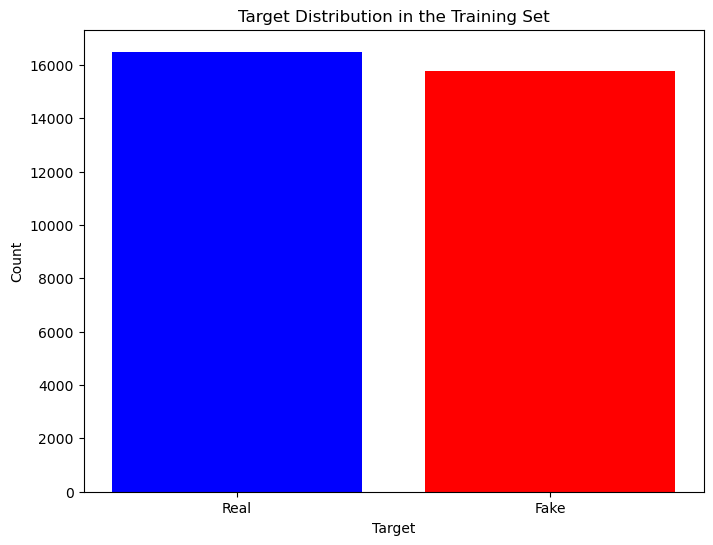

In [9]:
train_set = train_label.copy()
train_set['target'] = train_set['target'].replace({0: 'Real', 1: 'Fake'})

# Count the number of each target class
target_counts = train_set['target'].value_counts().reset_index()

# Rename the columns
target_counts.columns = ['Target', 'Count']

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(target_counts['Target'], target_counts['Count'], color=['blue' if target == 'Real' else 'red' for target in target_counts['Target']])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Distribution in the Training Set')
plt.xticks(['Real', 'Fake'])

# Display the plot
plt.show()

### An increase in fake images over real images may cause the problem of bias

# Display Images Real Vs FAke

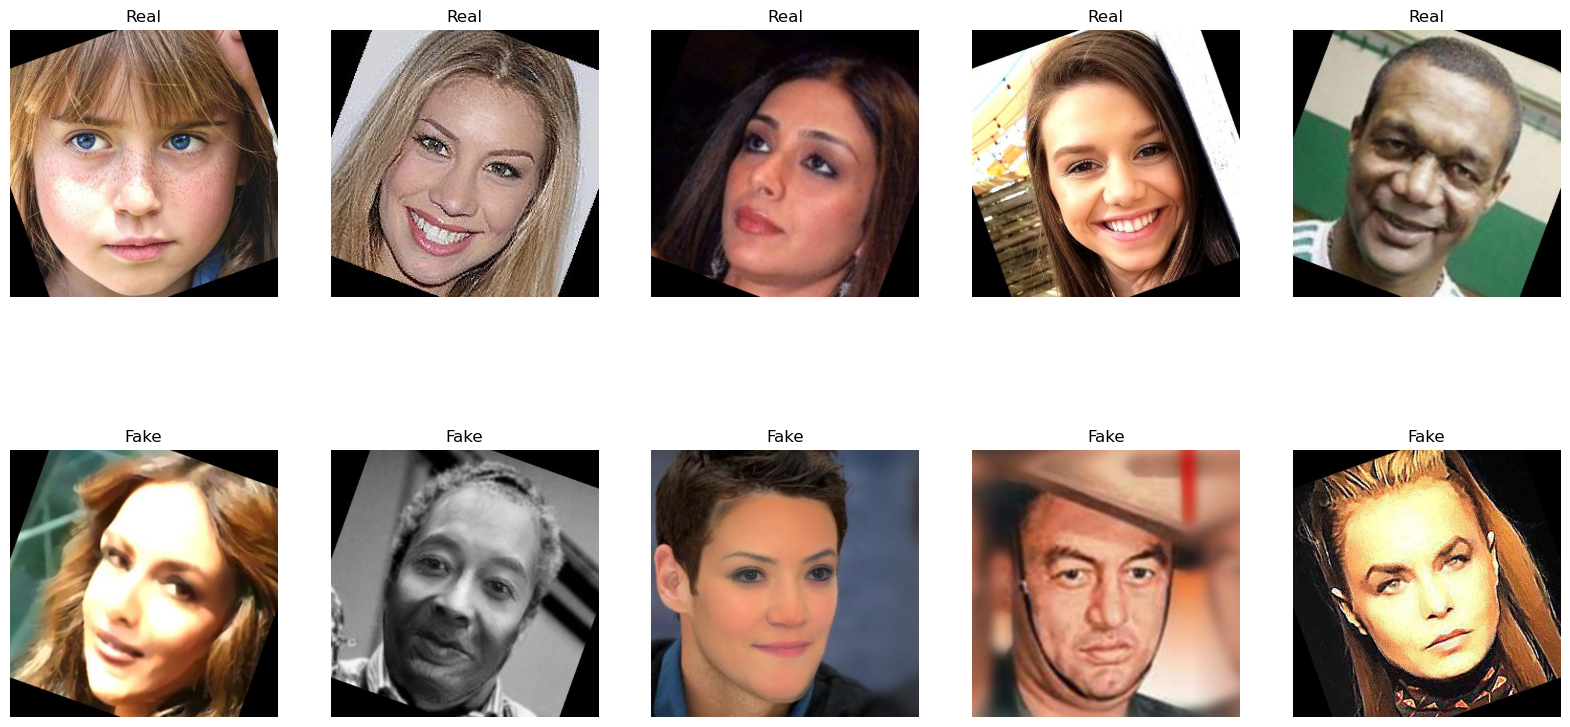

In [11]:
# if U want Open one image
#   from PIL import Image
#   img = Image.open('image.jpeg')
#   plt.imshow(img)

# Filter the dataframe to get only Real and Fake images
real_images = train_set[train_set['target'] == 'Real']
fake_images = train_set[train_set['target'] == 'Fake']

# Create a figure with 2 subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Plot the Real images
for i, row in enumerate(real_images.sample(5).itertuples()):
    img_path = row.path
    img = mpimg.imread(img_path)
    # Normalize pixel values
    img = img / 255.0
    axs[0, i].imshow(img)
    axs[0, i].set_title('Real')
    axs[0, i].axis('off')

# Plot the Fake images
for i, row in enumerate(fake_images.sample(5).itertuples()):
    img_path = row.path
    img = mpimg.imread(img_path)
    # Normalize pixel values
    img = img / 255.0
    axs[1, i].imshow(img)
    axs[1, i].set_title('Fake')
    axs[1, i].axis('off')

# Show the plot
plt.show()

<a id="import"></a>
# <p style="background-color:#040404; font-family:calibri; color:white; font-size:120%; text-align:center; border-radius:50px 50px;">  Step 3 | Data preprocess & Prepration   </p>


* Data Preparation: Images and labels are split into training and validation sets. Images are normalized and reshaped for CNN input.

* Model Creation: A simple CNN model is created with convolutional layers followed by dense layers.

* Model Training and Evaluation: The model is trained and evaluated on the validation set.

* This script assumes that the image paths in the CSV file are correct and accessible. Adjust the paths or preprocessing steps as necessary based on your specific dataset and requirements.

* Data Loading and Preprocessing: Images are loaded, resized to 128x128, converted to grayscale, blurred, and edges are extracted using Canny edge detection.

    

# Filtering and scaling Images

# 1) This code displays real images and fake images after applying the “Gradient Edges Gray Scaler” filter, which converts the images to grayscale and highlights the edges to help analyze the image 

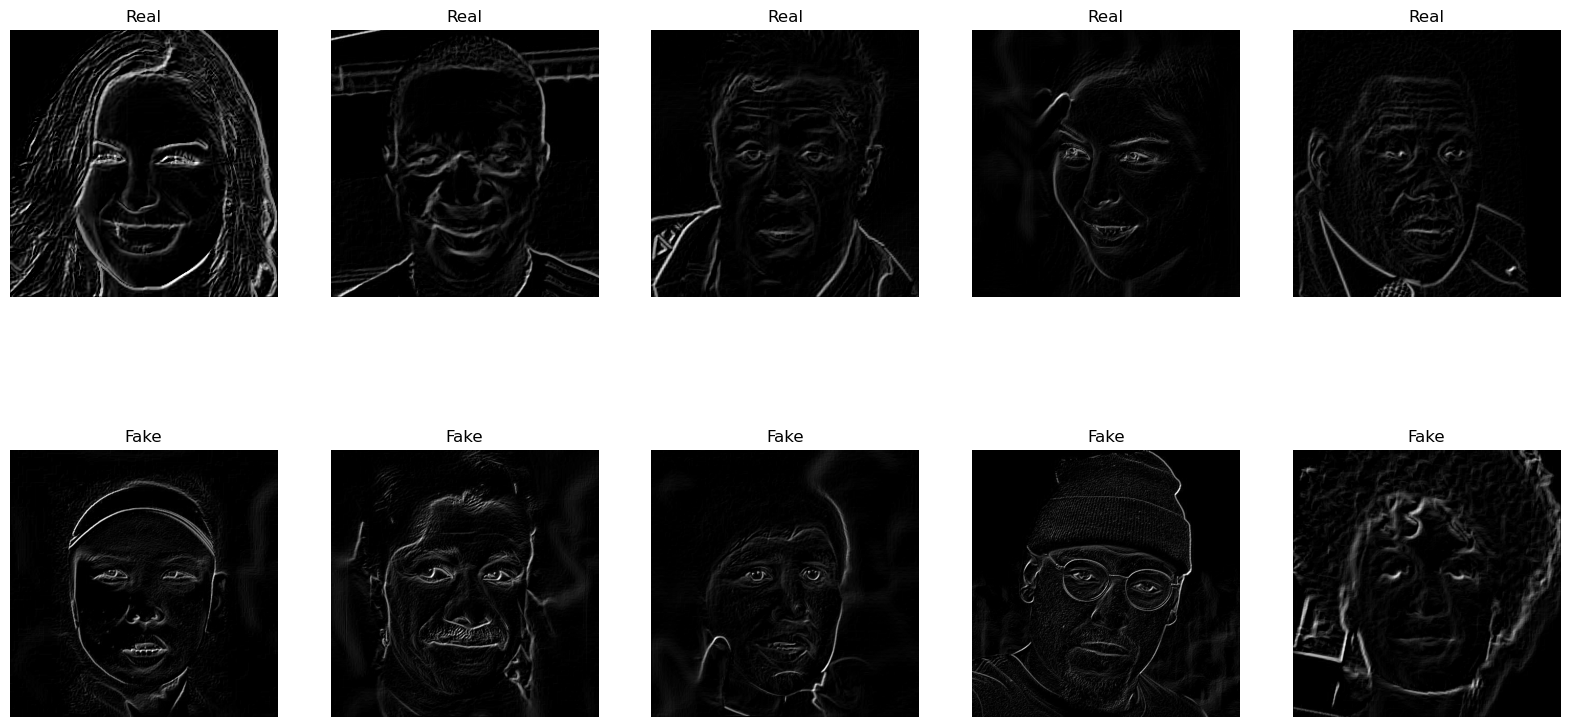

In [53]:
class ImageProcessor:
    def __init__(self, normalization_technique='divide_by_255'):
        self.normalization_technique = normalization_technique

    def load_and_normalize_image(self, img_path):
        """Load an image and normalize its pixel values"""
        img = mpimg.imread(img_path)
        if self.normalization_technique == 'divide_by_255':
            return img / 255.0
        else:
            raise ValueError("Invalid normalization technique")

    def apply_gradient_edges_gray_scaler(self, img):
        """Apply Gradient Edges Gray Scaler to an image"""
        # Convert image to grayscale
        gray = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
        
        # Apply Sobel operator to detect edges
        grad_x = cv2.Sobel(gray, cv2.CV_8U, 1, 0, ksize=3)
        grad_y = cv2.Sobel(gray, cv2.CV_8U, 0, 1, ksize=3)
        
        # Combine edges
        grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)
        
        return grad / 255.0

class ImagePlotter:
    def __init__(self):
        pass

    def plot_images(self, axs, images, title, normalization_technique='divide_by_255'):
        """Plot a list of images on a set of axes"""
        image_processor = ImageProcessor(normalization_technique)
        for i, img_path in enumerate(images.sample(5)['path']):
            img = image_processor.load_and_normalize_image(img_path)
            img = image_processor.apply_gradient_edges_gray_scaler(img)  # Apply Gradient Edges Gray Scaler
            axs[i].imshow(img, cmap='gray')  # Display as grayscale image
            axs[i].set_title(title)
            axs[i].axis('off')

class ImageDisplayer:
    def __init__(self):
        pass

    def display_real_and_fake_images(self, real_images, fake_images):
        """Display Real and Fake images in a 2x5 subplot"""
        fig, axs = plt.subplots(2, 5, figsize=(20, 10))
        image_plotter = ImagePlotter()
        image_plotter.plot_images(axs[0], real_images, 'Real')
        image_plotter.plot_images(axs[1], fake_images, 'Fake')
        plt.show()

# Filter the dataframe to get only Real and Fake images
Gradient_Edges_Gray_Scaler = train_label.copy()
Gradient_Edges_Gray_Scaler['target'] = Gradient_Edges_Gray_Scaler['target'].replace({0: 'Real', 1: 'Fake'})

real_images = Gradient_Edges_Gray_Scaler[Gradient_Edges_Gray_Scaler['target'] == 'Real']
fake_images = Gradient_Edges_Gray_Scaler[Gradient_Edges_Gray_Scaler['target'] == 'Fake']

Gradient_Edges_Gray_Scaler = ImageDisplayer()
Gradient_Edges_Gray_Scaler_1= Gradient_Edges_Gray_Scaler.display_real_and_fake_images(real_images, fake_images)
Gradient_Edges_Gray_Scaler_1

# 2) This code displays real and fake images after applying the "Gradient Edges Gray Scaler" filter, with the ability to choose different image normalization techniques (divide by 255, z-score, or min-max scaling) for improved analysis.

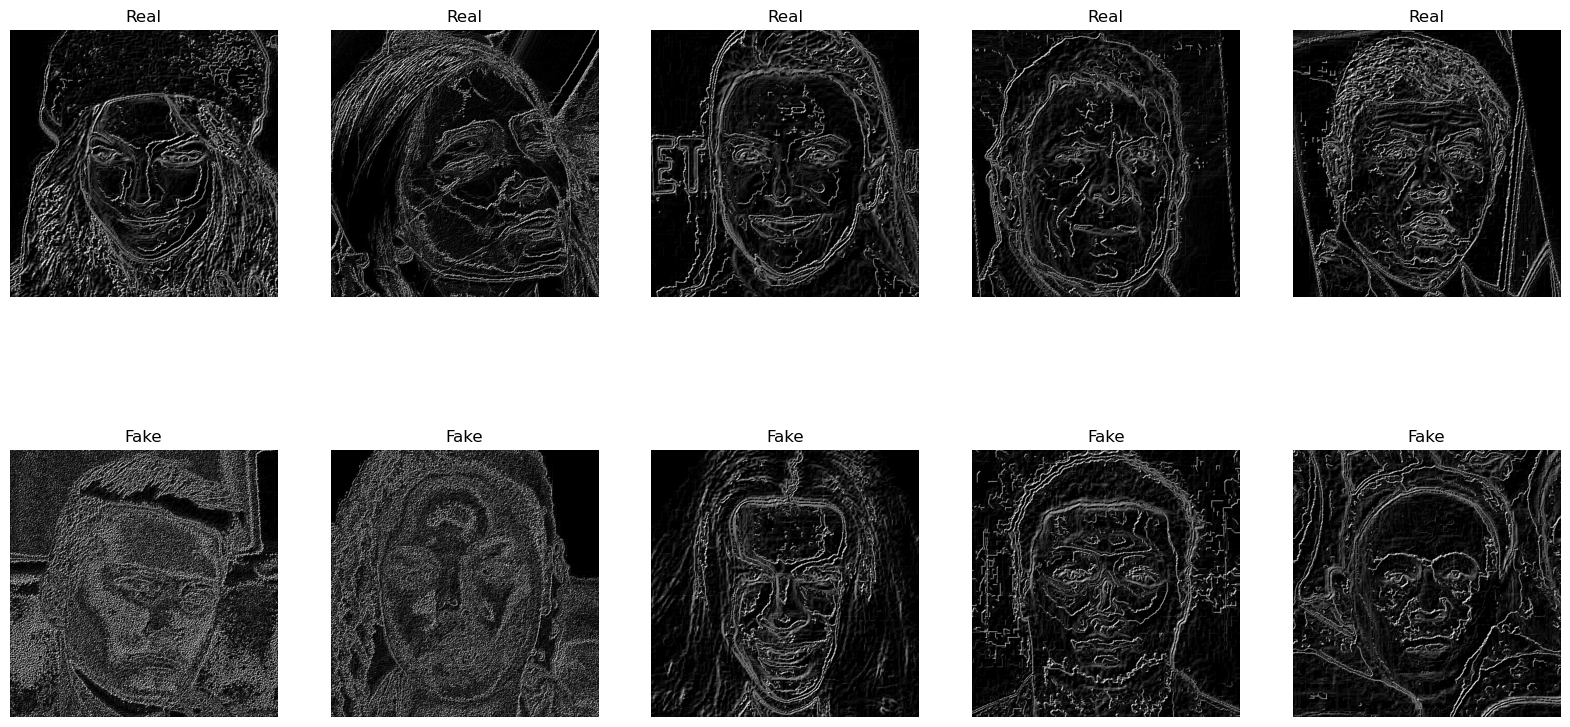

In [46]:
class ImageProcessor:
    def __init__(self, normalization_technique='divide_by_255'):
        self.normalization_technique = normalization_technique

    def load_and_normalize_image(self, path):
        """Load an image and normalize its pixel values"""
        img = mpimg.imread(path)
        
        if self.normalization_technique == 'divide_by_255':
            return img / 255.0
        elif self.normalization_technique == 'z_score':
            mean = np.mean(img, axis=(0, 1))
            std = np.std(img, axis=(0, 1))
            return (img - mean) / std
        elif self.normalization_technique == 'in_max':
            min_val = np.min(img)
            max_val = np.max(img)
            return (img - min_val) / (max_val - min_val)
        else:
            raise ValueError("Invalid normalization technique")

    def apply_gradient_edges_gray_scaler(self, img):
        """Apply Gradient Edges Gray Scaler to an image"""
        # Convert image to grayscale
        gray = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
        
        # Apply Sobel operator to detect edges
        grad_x = cv2.Sobel(gray, cv2.CV_8U, 1, 0, ksize=3)
        grad_y = cv2.Sobel(gray, cv2.CV_8U, 0, 1, ksize=3)
        
        # Combine edges
        grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)
        
        return grad / 255.0

class ImagePlotter:
    def __init__(self):
        pass

    def plot_images(self, axs, images, title, image_processor):
        """Plot a list of images on a set of axes"""
        for i, img_path in enumerate(images.sample(5)['path']):
            img = image_processor.load_and_normalize_image(img_path)
            img = image_processor.apply_gradient_edges_gray_scaler(img)  # Apply Gradient Edges Gray Scaler
            axs[i].imshow(img, cmap='gray')  # Display as grayscale image
            axs[i].set_title(title)
            axs[i].axis('off')

class ImageDisplayer:
    def __init__(self):
        pass

    def display_real_and_fake_images(self, real_images, fake_images, normalization_technique='divide_by_255'):
        """Display Real and Fake images in a 2x5 subplot"""
        fig, axs = plt.subplots(2, 5, figsize=(20, 10))
        image_processor = ImageProcessor(normalization_technique)
        image_plotter = ImagePlotter()
        image_plotter.plot_images(axs[0], real_images, 'Real', image_processor)
        image_plotter.plot_images(axs[1], fake_images, 'Fake', image_processor)
        plt.show()

normalization = train_label.copy()
normalization['target'] = normalization['target'].replace({0: 'Real', 1: 'Fake'})

real_images = normalization[normalization['target'] == 'Real']
fake_images = normalization[normalization['target'] == 'Fake']

normalization = ImageDisplayer()
normalization.display_real_and_fake_images(real_images, fake_images, normalization_technique='z_score')

# 3) Detect and compute SIFT features & Draw keypoints on the original image for deepfake detection.
* Image Feature Extraction: The code extracts image paths from a dataset, then uses the SIFT (Scale-Invariant Feature Transform) algorithm to reveal distinct “key points” in each image. These points represent areas of interest in the image, such as corners or edges.
* Visualization of key points: The code draws green circles on the original images to mark the locations of detected key points. It then displays 10 images in a grid, highlighting the key points in each image.
* In other words: Goal: To analyze the content of images by revealing distinct features (key points) that can later be used for image matching, classification, or other tasks.

Error: Unable to load image from path C:/Users/islam/Downloads/AI Work/deepfake/training_fake/image_metadata.csv
Error: Unable to load image from path C:/Users/islam/Downloads/AI Work/deepfake/training_real/image_metadata.csv


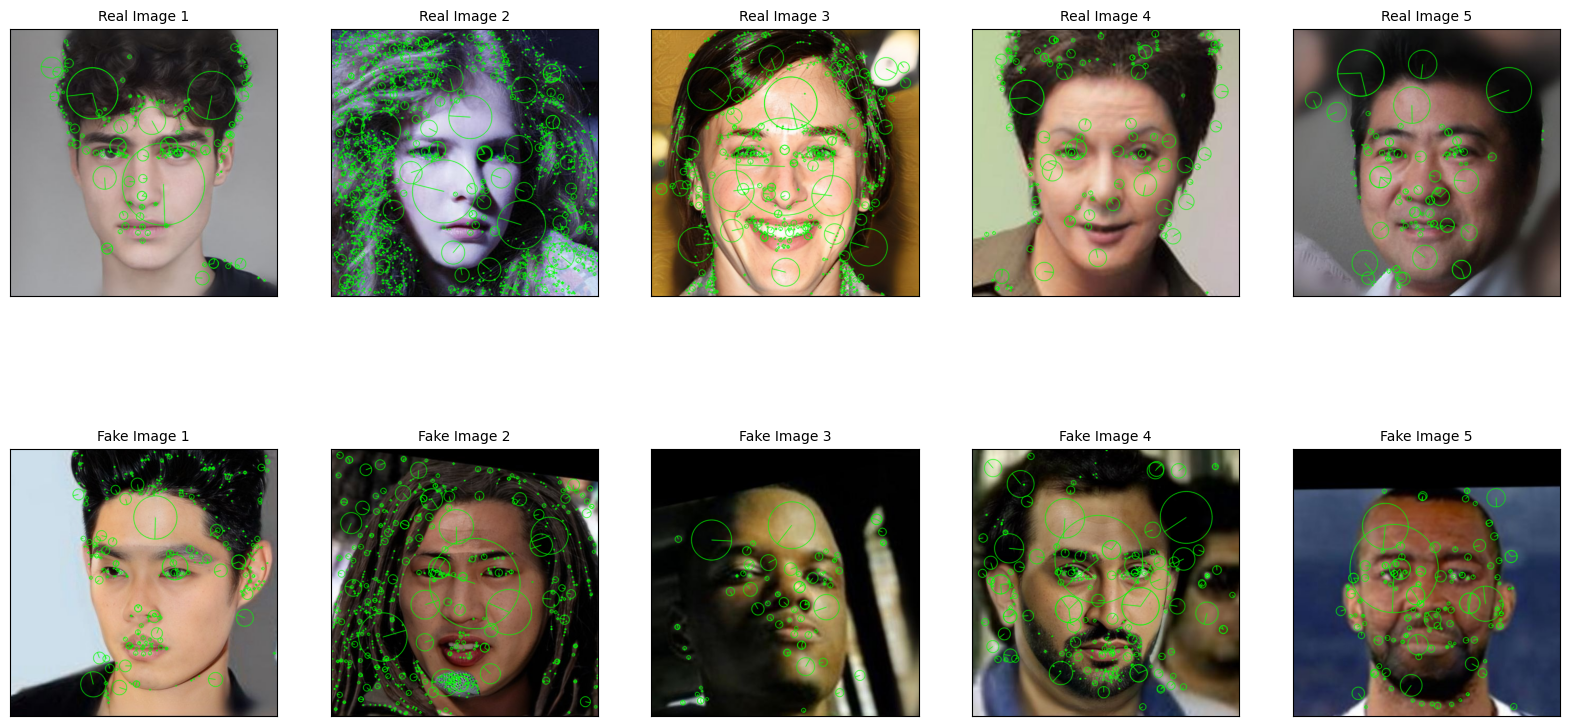

In [9]:
import cv2
import matplotlib.pyplot as plt

class SIFTFeatureExtractor:
    def __init__(self):
        self.sift = cv2.SIFT_create()

    def detect_and_draw_sift_features(self, image_path):
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Unable to load image from path {image_path}")
            return None
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        keypoints, descriptors = self.sift.detectAndCompute(gray_image, None)
        drawn_image = cv2.drawKeypoints(image, keypoints, None, (0, 255, 0), 4)
        return drawn_image

class ImageProcessor:
    def __init__(self, image_paths):
        self.image_paths = image_paths
        self.sift_extractor = SIFTFeatureExtractor()

    def process_images(self):
        drawn_images = []
        for path in self.image_paths:
            image = self.sift_extractor.detect_and_draw_sift_features(path)
            if image is not None:
                drawn_images.append(image)
        return drawn_images

class ImagePlotter:
    def plot_images(self, axs, images, title):
        for i, image in enumerate(images):
            ax = axs[i]
            ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            ax.set_title(f'{title} Image {i+1}', fontsize=10)
            ax.set_xticks([])
            ax.set_yticks([])

class ImageDisplayer:
    def __init__(self, drawn_images, targets):
        self.drawn_images = drawn_images
        self.targets = targets

    def display_real_and_fake_images(self):
        real_images = [image for image, target in zip(self.drawn_images, self.targets) if target == 'Real']
        fake_images = [image for image, target in zip(self.drawn_images, self.targets) if target == 'Fake']
        fig, axs = plt.subplots(2, 5, figsize=(20, 10))
        image_plotter = ImagePlotter()
        image_plotter.plot_images(axs[0], real_images[:5], 'Real')
        image_plotter.plot_images(axs[1], fake_images[:5], 'Fake')
        plt.show()

# Usage
SIFT = train_label.copy()
SIFT['target'] = SIFT['target'].replace({0: 'Real', 1: 'Fake'})

image_paths = SIFT['path']
targets = SIFT['target']

image_processor = ImageProcessor(image_paths)
drawn_images = image_processor.process_images()

SIFT = ImageDisplayer(drawn_images, targets)
SIFT.display_real_and_fake_images()

# Function to load and preprocess images

In [10]:
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None
    img = cv2.resize(img, (128, 128))                      # Resize to a consistent size
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)         # Convert to grayscale
    img = cv2.GaussianBlur(img, (5, 5), 0)         # Apply Gaussian blur
    img = cv2.Canny(img, 100, 200)          # Apply Canny edge detection
    return img

# Prepare data

In [11]:
X = []
Y = []

for index, row in train_label.iterrows():
    if 'path' in row:
        img_path = row['path']
        label = row['target']
        img = load_and_preprocess_image(img_path)
        if img is None:
            continue
        X.append(img)
        Y.append(label)

X = np.array(X)
Y = np.array(Y)

# Split data into training and validation sets and Feature Scaling

In [12]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42,shuffle=True)

# Normalize the data
X_train = X_train / 255.0   # ( على 255 عشان تخلي القيم بين 0 و 1.)بيقسم قيم كل بكسل في الصور اللي  
X_val = X_val / 255.0

# Reshape for CNN input
X_train = X_train.reshape(-1, 128, 128, 1)
X_val = X_val.reshape(-1, 128, 128, 1)

# Convert labels to categorical
Y_train = to_categorical(Y_train, num_classes=2)
Y_val = to_categorical(Y_val, num_classes=2)

<a id="import"></a>
# <p style="background-color:#040404; font-family:calibri; color:white; font-size:120%; text-align:center; border-radius:50px 50px;">  Step 3 | Create The Model Training Data  </p>

# Create the Model Display Artiticture

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)), 
    
    MaxPooling2D((2, 2)),# دي طبقة بتقلل حجم الصورة للنص 0.5 عشان تسرع الحسابات وتقلل من المعاملات
    Conv2D(64, (3, 3), activation='relu'), # زي الطبقة اللي قبلها بس هنا هنستخدم 64 فلتر

    MaxPooling2D((2, 2)),# بتقلل حجم الصورة تاني
    Conv2D(128, (3, 3), activation='relu'), # زي الطبقة اللي قبلها بس هنا هنستخدم 128 فلتر
    MaxPooling2D((2, 2)), # بتقلل حجم الصورة تاني
    Flatten(), # بتعمل الصورة شكل خط مستقيم بدل ما كان عمودي بيبقي افقي عشان تدخل للطبقات اللي بعدها

    Dense(128, activation='relu'), # دي طبقة متصلة تماماً (Dense) وليها 128 خلية عصبية


    Dense(2, activation='softmax') # "softmax" لتحديد احتمالية كل فئة
                                    # وحدتان (Neurons) في الطبقة (لأن هنصنف الصورة إلى فئتين)
]) # دي الطبقة الأخيرة وليها خليتين عصبية. كل خلية هتقول احتمال إن الصورة دي تنتمي لفئة معينة

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # SGB ==> BIG DATA


In [14]:
# Define the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,322 (12.60 MB)

 Trainable params: 3,304,322 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
import pydot
import pydotplus
from keras.utils import plot_model
from IPython.display import Image

# plot_model(model, to_file='model_architecture.png', show_shapes=True)
# # Display the saved image
# Image('model_architecture.png')

In [16]:
# Train the model and capture the history
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/10
807/807 ━━━━━━━━━━━━━━━━━━━━ 261s 320ms/step - accuracy: 0.6885 - loss: 0.5797 - val_accuracy: 0.7827 - val_loss: 0.4560
Epoch 2/10
807/807 ━━━━━━━━━━━━━━━━━━━━ 296s 362ms/step - accuracy: 0.8076 - loss: 0.4086 - val_accuracy: 0.8216 - val_loss: 0.3876
Epoch 3/10
807/807 ━━━━━━━━━━━━━━━━━━━━ 330s 371ms/step - accuracy: 0.8832 - loss: 0.2796 - val_accuracy: 0.8585 - val_loss: 0.3537
Epoch 4/10
807/807 ━━━━━━━━━━━━━━━━━━━━ 291s 361ms/step - accuracy: 0.9382 - loss: 0.1585 - val_accuracy: 0.8661 - val_loss: 0.3686
Epoch 5/10
807/807 ━━━━━━━━━━━━━━━━━━━━ 291s 361ms/step - accuracy: 0.9717 - loss: 0.0827 - val_accuracy: 0.8741 - val_loss: 0.4112
Epoch 6/10
807/807 ━━━━━━━━━━━━━━━━━━━━ 269s 334ms/step - accuracy: 0.9808 - loss: 0.0543 - val_accuracy: 0.8813 - val_loss: 0.4906
Epoch 7/10
807/807 ━━━━━━━━━━━━━━━━━━━━ 325s 337ms/step - accuracy: 0.9849 - loss: 0.0481 - val_accuracy: 0.8788 - val_loss: 0.4738
Epoch 8/10
807/807 ━━━━━━━━━━━━━━━━━━━━ 322s 337ms/step - accuracy: 0.9901 -

<a id="import"></a>
# <p style="background-color:#040404; font-family:calibri; color:white; font-size:120%; text-align:center; border-radius:50px 50px;">  Step 4 | Model Evalution  </p>


# Evaluate the model

In [16]:
Y_pred = model.predict(X_val)

Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true_classes = np.argmax(Y_val, axis=1)

accuracy = accuracy_score(Y_true_classes, Y_pred_classes)
print(f'Validation Accuracy retio : {accuracy * 100:.2f}%')

loss, accuracy = model.evaluate(X_val, Y_val)
print(f'Validation accuracy: {accuracy:.3f}')
print(f'Validation loss: {loss:.3f}')

210/210 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step
Validation Accuracy retio : 89.09%
210/210 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.8966 - loss: 0.4818
Validation accuracy: 0.891
Validation loss: 0.506


# Plot training and validation accuracy vs epoch

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Plot training and validation accuracy vs epoch
history_dict = history.history
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss vs epoch
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', color='orange')
plt.plot(epochs, val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# To explain:

### The plots indicate that the model learns effectively from training data and generalizes well to evaluation data. There is a positive relationship between data augmentation and training ability and performance, indicating that the model is not overfitting. This indicates that the model is likely to perform well on unseen data, i.e. new data.

# confusion_matrix

### Here we will work on debunking the model

202/202 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step


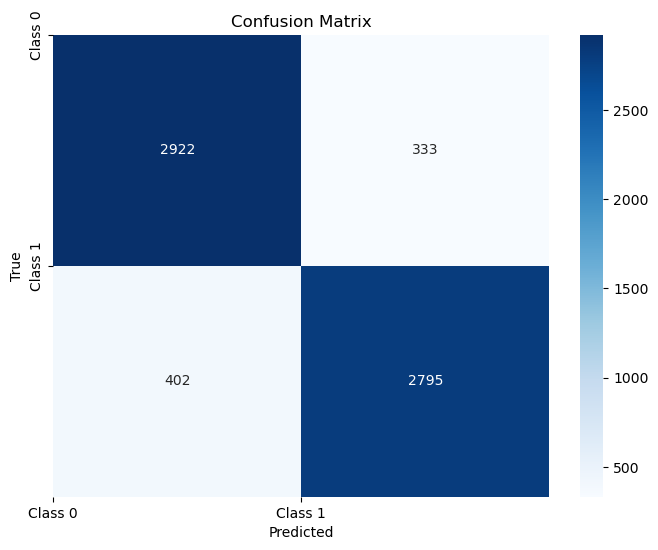

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.88      0.90      0.89      3255
     Class 1       0.89      0.87      0.88      3197

    accuracy                           0.89      6452
   macro avg       0.89      0.89      0.89      6452
weighted avg       0.89      0.89      0.89      6452



In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import Model

# Assuming model, X_val, Y_val are already defined and model is compiled

# Get the predicted probabilities
y_pred_proba = model.predict(X_val)

# Get the predicted classes
y_pred_classes = np.argmax(y_pred_proba, axis=1)

# Get the true classes
y_true_classes = np.argmax(Y_val, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Create a matplotlib heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0, 1], ['Class 0', 'Class 1'])  # Replace with actual class names if available
plt.yticks([0, 1], ['Class 0', 'Class 1'])  # Replace with actual class names if available

# Display the confusion matrix
plt.show()

# Calculate the classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=['Class 0', 'Class 1'])  # Replace with actual class names if available

# Print the classification report
print('Classification Report:')
print(report)

# ROC curve

202/202 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step


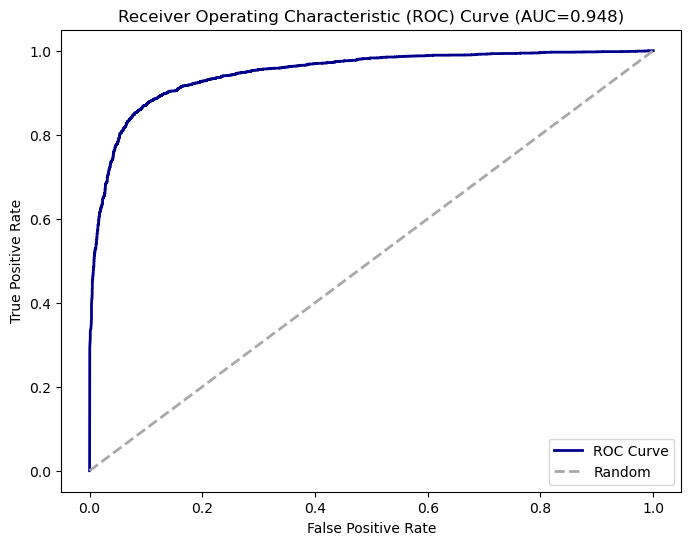

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score
from keras.models import Model

# Assuming model, X_val, Y_val are already defined and model is compiled

# Get the predictions on the validation set
y_pred_proba = model.predict(X_val)

# Get the true labels from the validation data
y_true = np.argmax(Y_val, axis=1)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba[:, 1])  # Assuming binary classification

# Compute the AUC
auc_value = auc(fpr, tpr)

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--', label='Random')

plt.title(f'Receiver Operating Characteristic (ROC) Curve (AUC={auc_value:.3f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.show()

# Make predictions and display original images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


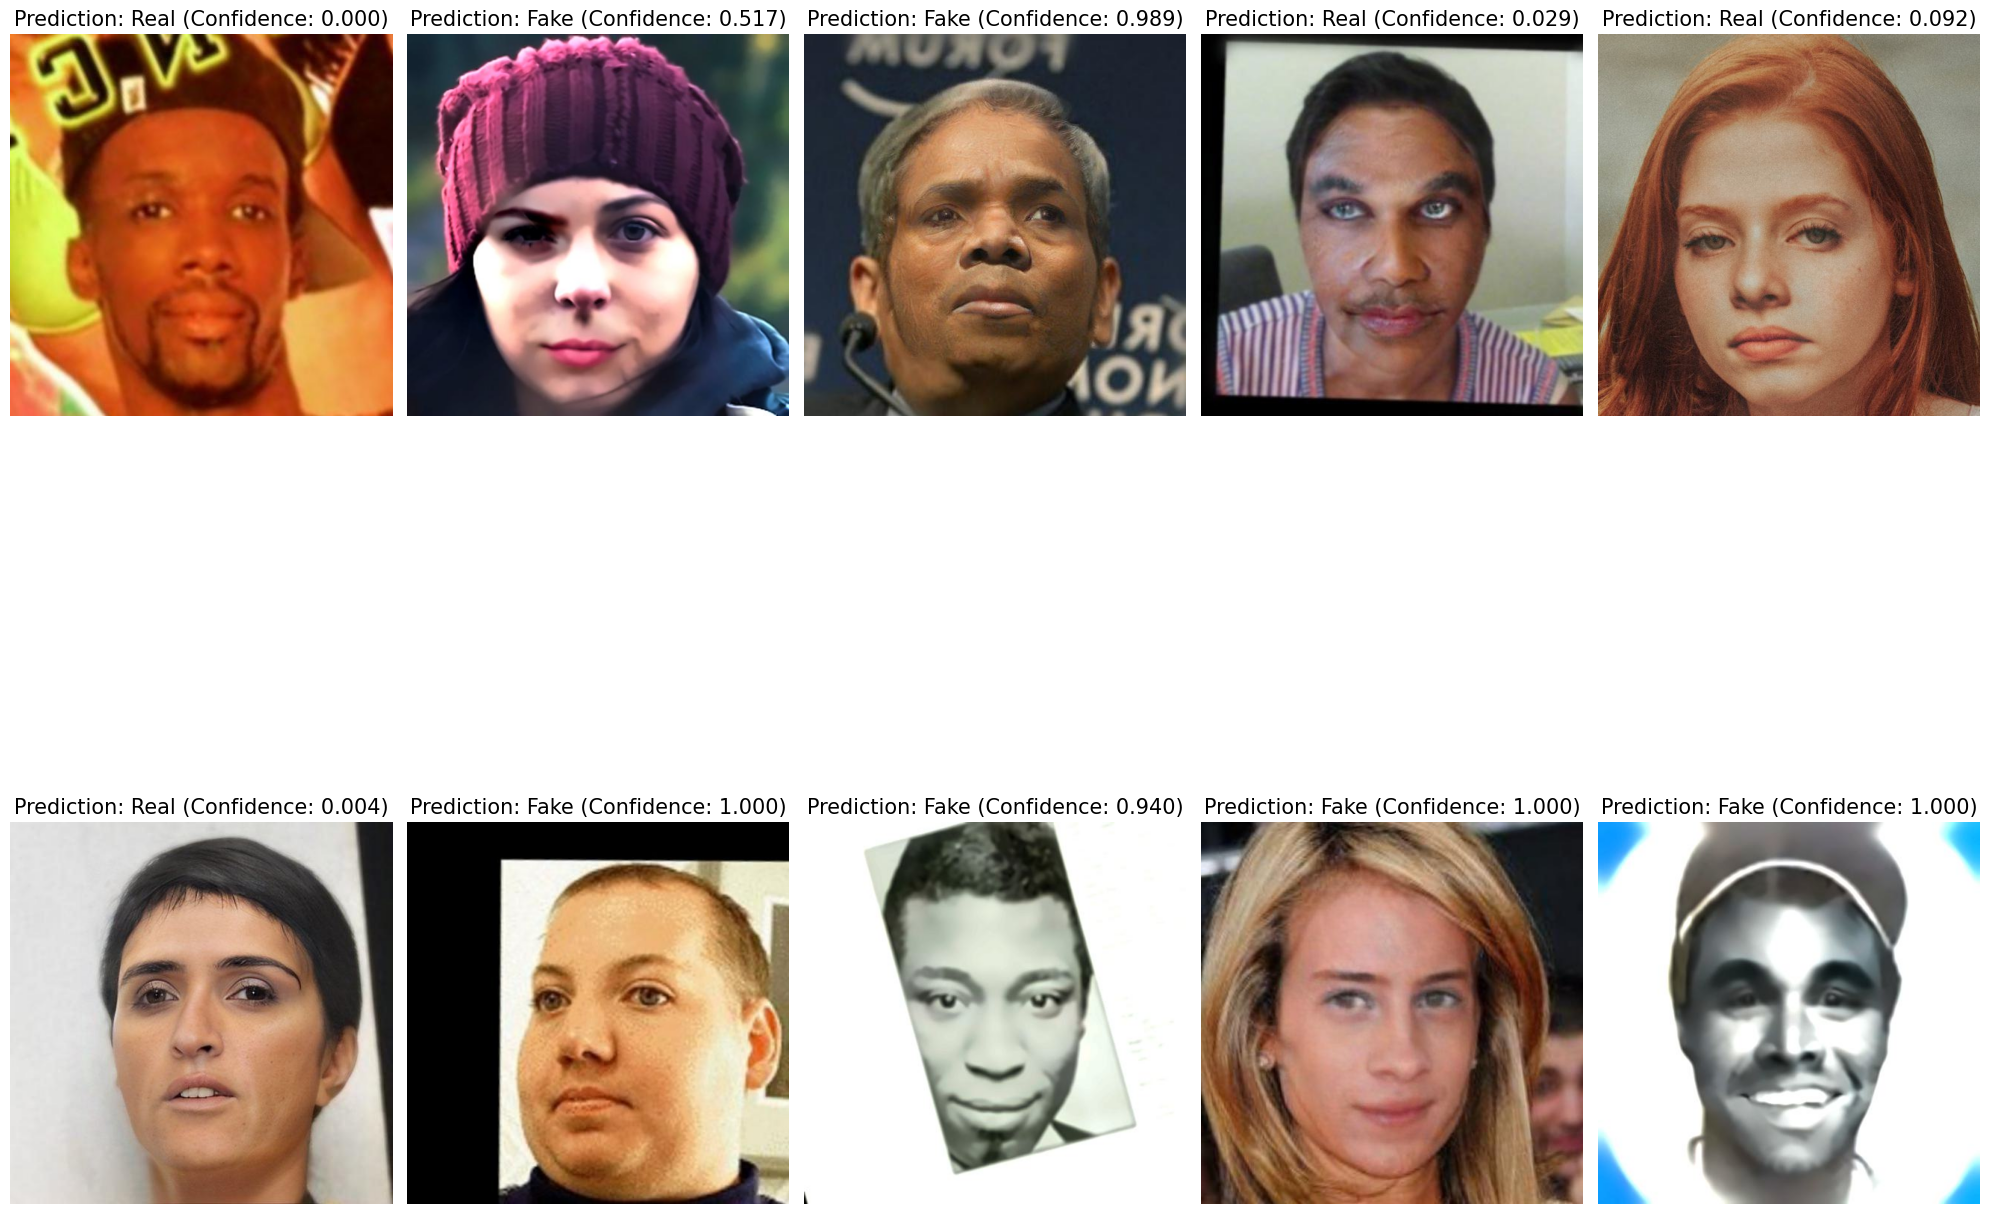

In [19]:
# Select 10 random images from X_val
selected_indices = np.random.choice(X_val.shape[0], 10, replace=False)
selected_images = X_val[selected_indices]


fig, axs = plt.subplots(2, 5, figsize=(20, 20))
for i, idx in enumerate(selected_indices):
    img = selected_images[i]
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    prediction_class = 'Real' if prediction[0][0] < 0.5 else 'Fake'

    # Load original image from file path
    original_img_path = train_label.iloc[idx]['path']
    original_img = cv2.imread(original_img_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

    # Display the original image with the prediction
    axs[i // 5, i % 5].imshow(original_img)
    axs[i // 5, i % 5].set_title(f'Prediction: {prediction_class} (Confidence: {prediction[0][0]:.3f})', fontsize=15)
    axs[i // 5, i % 5].axis('off')

plt.tight_layout()
plt.show()

<a id="import"></a>
# <p style="background-color:#040404; font-family:calibri; color:white; font-size:120%; text-align:center; border-radius:50px 50px;">  Step 5 | Z Application & Deployment   </p>


# A program application using (StreamLite or MernStack) interfaces a user in which he uploads his own image, and then the model detects the image and determines whether the image is real or fake.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


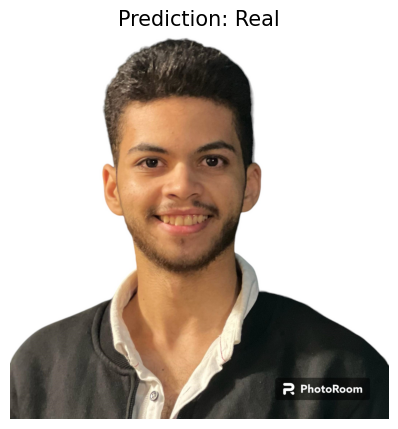

In [37]:
# Path to the new image
new_image_path = "C:\\Users\\islam\\Downloads\\sd-Photoroom.jpg"

# Load the new image in grayscale
new_image_gray = cv2.imread(new_image_path, cv2.IMREAD_GRAYSCALE)
new_image_gray = cv2.resize(new_image_gray, (128, 128))  # Resize to match model's input shape
new_image_gray = np.expand_dims(new_image_gray, axis=-1)  # Add channel dimension
new_image_gray = np.expand_dims(new_image_gray, axis=0)  # Add batch dimension
new_image_gray = new_image_gray / 255.0  # Normalize

# Make prediction
prediction = model.predict(new_image_gray)
prediction_class = 'Real' if prediction[0][0] > 0.5 else 'Fake'

# Load the original image in color
original_image = cv2.imread(new_image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

# Display the original image with the prediction
plt.figure(figsize=(5, 5))
plt.imshow(original_image)
plt.title(f'Prediction: {prediction_class}', fontsize=15)
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


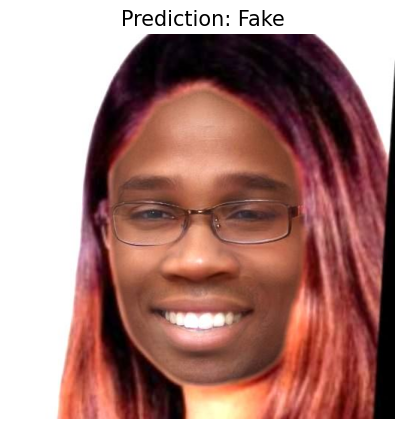

In [36]:
# Path to the new image
new_image_path = r"C:\Users\islam\Downloads\transformed_images\light_changed_78523sadf15dfad132 (54).jpg"

# Load the new image in grayscale
new_image_gray = cv2.imread(new_image_path, cv2.IMREAD_GRAYSCALE)
new_image_gray = cv2.resize(new_image_gray, (128, 128))  # Resize to match model's input shape
new_image_gray = np.expand_dims(new_image_gray, axis=-1)  # Add channel dimension
new_image_gray = np.expand_dims(new_image_gray, axis=0)  # Add batch dimension
new_image_gray = new_image_gray / 255.0  # Normalize

# Make prediction
prediction = model.predict(new_image_gray)
prediction_class = 'Real' if prediction[0][0] > 0.5 else 'Fake'

# Load the original image in color
original_image = cv2.imread(new_image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

# Display the original image with the prediction
plt.figure(figsize=(5, 5))
plt.imshow(original_image)
plt.title(f'Prediction: {prediction_class}', fontsize=15)
plt.axis('off')
plt.show()


In [32]:
# Save the model using the new format
model.save('path_to_model.keras')

# Load the model using the new format
from tensorflow.keras.models import load_model
model = load_model('path_to_model.keras')

<div style="border-radius:12px; padding: 20px; background-color: #2E86C1; font-size:125%; text-align:left">

<h2 align="left"><font color=#F4F6F7> Conclusion : </font></h2>
<p align="left"><font color=#F4F6F7>
    Amid the digital revolution and the development of deepfake technologies, detecting fake images has become an urgent necessity to maintain the credibility of information and avoid the spread of fake news. This research has shown that our proposed model is a promising step in this direction, achieving high accuracy in detecting image manipulation. However, there is still a lot of room for improvement and development, such as increasing the model’s ability to handle low-quality images or handling more complex types of manipulation. The research can also be extended to other types of multimedia, such as videos. We hope that this research will contribute to the development of more effective tools to combat digital misinformation and protect society from the negative effects of fake news.

<h3 align="left"><font color=#F4F6F7>Explanation:</font></h3>
     This paper provides a detailed look at the challenge of detecting fake images and developing a model capable of dealing with this problem. Despite the encouraging results achieved, this field is still in its infancy and faces many challenges. As deepfake technologies evolve, detection systems must constantly adapt to these developments. In addition, there is a need for more diverse, high-quality data to train models, as well as the development of standardized criteria to evaluate the performance of these models.

 </font></p>